<a href="https://colab.research.google.com/github/Ekansh236/CNN-for-Lung-Cancer/blob/main/CNN_for_Lung_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')     #needing to access google drive for our images

Mounted at /content/drive


In [ ]:
%config Completer.use_jedi = False
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns
import cv2
import os
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
from skimage import color
import scipy.misc
import PIL

In [ ]:
categories = ['Benign cases', 'Malignant cases', 'Normal cases']   #the 3 different output types
img_size = 256    #variable to resize image

transform = torchvision.transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),  # Convert image to PyTorch tensor
    torchvision.transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(p=0.5),
    transforms.RandomRotation(90),
    transforms.Normalize((0.5, 0.5, 0.5),  # Normalize the image to have a mean of 0.5 and std of 0.5
                         (0.5, 0.5, 0.5))
])

In [ ]:
batch_size = 3

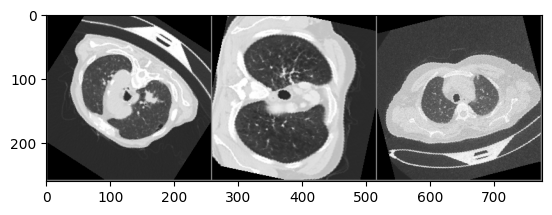

In [ ]:
def imshow(img):   #function to unnormalize in order to show the images in the later code
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

data = torchvision.datasets.ImageFolder('/content/drive/MyDrive/archive (2)/The IQ-OTHNCCD lung cancer dataset/The IQ-OTHNCCD lung cancer dataset', transform=transform)
trainloader = torch.utils.data.DataLoader(data, batch_size=batch_size, shuffle=True)   #making training dataset and trainloader

testset = torchvision.datasets.ImageFolder('/content/drive/MyDrive/archive (2)/Test Cases/Test cases', transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=True)   #making test set and testloader

dataiter = iter(trainloader)
images, labels = next(dataiter)   #getting random images

imshow(torchvision.utils.make_grid(images))  #displaying random images
print(' '.join(f'{categories[labels[j]]:5s}' for j in range(batch_size)))

print(len(data))

In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()

        self.conv1 = nn.Conv2d(3, 8, 3, padding=1)
        self.pool1 = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(8, 16, 3, padding=1)
        self.pool2 = nn.MaxPool2d(2, 2)

        self.fc1 = nn.Linear(16 * 64 * 64, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 3)

    def forward(self, x):
        x = self.pool1(F.relu(self.conv1(x)))
        x = self.pool2(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1)  # Flatten the tensor (keep the batch dimension intact)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = CNN()
criterion = nn.CrossEntropyLoss()   #using cross entropy loss for our error
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)  #optimizer helps with the weight updating

Malignant cases Malignant cases Normal cases
881


In [ ]:
for epoch in range(45):  # loop over the dataset multiple times
    print("epoch", epoch + 1)
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs.float())
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 50 == 49:    # print every 50 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print("completed")

epoch 1
[1,    50] loss: 0.027
[1,   100] loss: 0.024
[1,   150] loss: 0.024
[1,   200] loss: 0.023
[1,   250] loss: 0.024
epoch 2
[2,    50] loss: 0.021
[2,   100] loss: 0.023
[2,   150] loss: 0.024
[2,   200] loss: 0.023
[2,   250] loss: 0.022
epoch 3
[3,    50] loss: 0.023
[3,   100] loss: 0.023
[3,   150] loss: 0.020
[3,   200] loss: 0.023
[3,   250] loss: 0.023
epoch 4
[4,    50] loss: 0.024
[4,   100] loss: 0.023
[4,   150] loss: 0.022
[4,   200] loss: 0.022
[4,   250] loss: 0.022
epoch 5
[5,    50] loss: 0.020
[5,   100] loss: 0.023
[5,   150] loss: 0.022
[5,   200] loss: 0.023
[5,   250] loss: 0.023
epoch 6
[6,    50] loss: 0.025
[6,   100] loss: 0.024
[6,   150] loss: 0.022
[6,   200] loss: 0.023
[6,   250] loss: 0.023
epoch 7
[7,    50] loss: 0.020
[7,   100] loss: 0.021
[7,   150] loss: 0.020
[7,   200] loss: 0.021
[7,   250] loss: 0.021
epoch 8
[8,    50] loss: 0.020
[8,   100] loss: 0.024
[8,   150] loss: 0.022
[8,   200] loss: 0.021
[8,   250] loss: 0.023
epoch 9
[9,    5

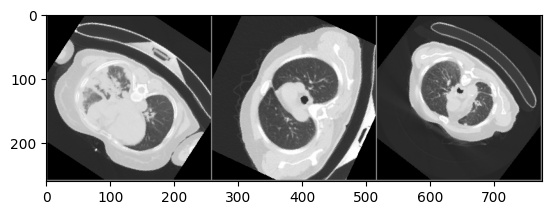

GroundTruth:  Malignant cases Normal cases Malignant cases
Predicted:  Malignant cases Malignant cases Malignant cases
Accuracy of the network: 72 %
-----------
Class: Benign cases
Precision: 25.00%
Recall: 15.38%
f1_score: 19.047619047619047
-----------
Class: Malignant cases
Precision: 75.61%
Recall: 82.30%
f1_score: 78.8135593220339
-----------
Class: Normal cases
Precision: 73.81%
Recall: 73.81%
f1_score: 73.80952380952381


[]

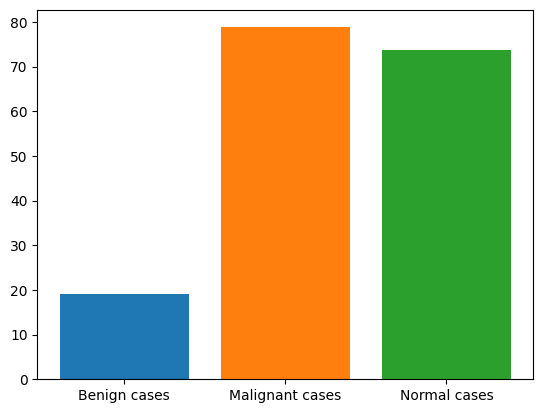

In [ ]:
from matplotlib.axis import YAxis
PATH = './CNN.pth'    #saves the model so we can refer to it
torch.save(net.state_dict(), PATH)

dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))   #prints images from test data
print('GroundTruth: ', ' '.join(f'{categories[labels[j]]}' for j in range(3)))

net = CNN()
net.load_state_dict(torch.load(PATH))  #using the previous model we trained

outputs = net(images)

_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{categories[predicted[j]]}'      #printing out the predictions of the images we gave
                              for j in range(3)))

correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:   #for each image in testloader, we find the predicted value
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        #imgs = imshow(torchvision.utils.make_grid(images))   #prints images from test data
        #print('GroundTruth: ', ' '.join(f'{categories[labels[j]]}' for j in range(len(images))))
        #print('Predicted: ', ' '.join(f'{categories[predicted[j]]}' for j in range(len(images))))
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network: {100 * correct // total} %')

# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in categories}
total_pred = {classname: 0 for classname in categories}
true_positives = {classname: 0 for classname in categories}
false_positives = {classname: 0 for classname in categories}
false_negatives = {classname: 0 for classname in categories}


# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):    #updating the correct prediciton count
            if label == prediction:
                correct_pred[categories[label]] += 1
            total_pred[categories[label]] += 1
            if label == prediction:
                true_positives[categories[label]] += 1
            else:
                false_positives[categories[prediction]] += 1
                false_negatives[categories[label]] += 1

#print precision and recall
for classname, true_positive_count in true_positives.items():
    false_positive_count = false_positives[classname]
    false_negative_count = false_negatives[classname]
    if true_positive_count + false_positive_count == 0:
        precision = 0.0
    else:
        precision = 100 * true_positive_count / (true_positive_count + false_positive_count)
    if true_positive_count + false_negative_count == 0:
        recall = 0.0
    else:
        recall = 100 * true_positive_count / (true_positive_count + false_negative_count)
    if precision + recall == 0:
      f1_score = 0
    else:
      f1_score = 2 * (precision * recall)/(precision + recall)

    print('-----------')
    print(f'Class: {classname}')
    print(f'Precision: {precision:.2f}%')
    print(f'Recall: {recall:.2f}%')
    print(f'f1_score: {f1_score}')
    plt.bar(classname, f1_score)
plt.plot()


